In [44]:
import os
import numpy as np
import pandas as pd
import scipy
import umap
import seaborn as sns
import matplotlib.pyplot as plt
from gc import collect
from matplotlib.ticker import MaxNLocator
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import ExtraTreesRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, RidgeClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV, SequentialFeatureSelector, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.kernel_approximation import Nystroem
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.base import clone
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, make_scorer, r2_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, FunctionTransformer, PolynomialFeatures, MinMaxScaler

In [45]:
def get_feats(mode='train'):
   
    feats=pd.read_excel(f"./widsdatathon2025/{mode}/{mode}_QUANTITATIVE_METADATA.xlsx")
    
    if mode=='TRAIN':
        cate=pd.read_excel(f"./widsdatathon2025/{mode}/{mode}_CATEGORICAL_METADATA.xlsx")
    else:
        cate=pd.read_excel(f"./widsdatathon2025/{mode}/{mode}_CATEGORICAL.xlsx")
    feats=feats.merge(cate,on='participant_id',how='left')
    
    func=pd.read_csv(f"./widsdatathon2025/{mode}/{mode}_FUNCTIONAL_CONNECTOME_MATRICES.csv")
    feats=feats.merge(func,on='participant_id',how='left')

    if mode=='TRAIN':
        solution=pd.read_excel("./widsdatathon2025/TRAIN/TRAINING_SOLUTIONS.xlsx")
        feats=feats.merge(solution,on='participant_id',how='left')
        
    return feats
    
train=get_feats(mode='TRAIN')
test=get_feats(mode='TEST')
sub = pd.read_excel('./widsdatathon2025/SAMPLE_SUBMISSION.xlsx')
y = pd.read_excel(f"./widsdatathon2025/TRAIN/TRAINING_SOLUTIONS.xlsx")

In [46]:
train.set_index('participant_id',inplace=True)
test.set_index('participant_id',inplace=True)
targets = ['ADHD_Outcome','Sex_F']
features = test.columns
features.shape

(19927,)

In [47]:
def check_for_nulls(df):
  if df.isnull().any().any():
    print("The DataFrame contains null values.")
  else:
    print("The DataFrame does not contain null values.")

In [48]:
check_for_nulls(train)
check_for_nulls(test)
print(f'Train: {train.shape}, Test: {test.shape}')

The DataFrame contains null values.
The DataFrame contains null values.
Train: (1213, 19929), Test: (304, 19927)


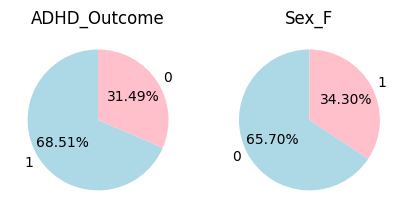

In [58]:
fig, axs = plt.subplots(1,2, figsize=(5,3))

for col, ax in zip(y.drop('participant_id',axis=1), axs):    
    counts = y[col].value_counts()
    ax.pie(counts, labels=counts.index, 
           autopct='%1.2f%%', 
           startangle=90, colors = ["lightblue", "pink"])
    ax.set_title(f'{col}')